### Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Load the dataset

In [2]:
df = pd.read_csv('../data/final_dataset.csv')

# Display the first few rows
df.head()

,Name,Total Matches,Innings,Average Score,Strike Rate,Highest Score,Fours,Sixes,Fifties,Hundreds,Total Runs
0,Sachin TENDULKAR,463,452,44.83,86.23,200.0,2016.0,195.0,96.0,49.0,18426
1,Virat Kohli,297,285,57.93,93.52,183.0,1310.0,152.0,73.0,50.0,13963
2,Sourav Ganguly,311,300,41.02,73.70,183.0,1122.0,190.0,72.0,22.0,11363
3,Rohit Sharma,268,260,49.05,92.69,264.0,1024.0,338.0,57.0,32.0,10988
4,Rahul Dravid,344,318,39.16,71.23,153.0,950.0,42.0,83.0,12.0,10889


### Check Data Types and Handle Non-Numeric Columns

In [3]:
# Check data types of each column
print(df.dtypes)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("\nNon-Numeric Columns:", non_numeric_cols.tolist())

Name              object
Total Matches      int64
Innings            int64
Average Score    float64
Strike Rate      float64
Highest Score    float64
Fours            float64
Sixes            float64
Fifties          float64
Hundreds         float64
Total Runs         int64
dtype: object

Non-Numeric Columns: ['Name']


In [4]:
# Drop the 'Name' column since it's not needed for numerical predictions
df = df.drop(columns=['Name'])

# Verify the changes
print(df.head())

   Total Matches  Innings  Average Score  Strike Rate  Highest Score   Fours  \
0            463      452          44.83        86.23          200.0  2016.0   
1            297      285          57.93        93.52          183.0  1310.0   
2            311      300          41.02        73.70          183.0  1122.0   
3            268      260          49.05        92.69          264.0  1024.0   
4            344      318          39.16        71.23          153.0   950.0   

   Sixes  Fifties  Hundreds  Total Runs  
0  195.0     96.0      49.0       18426  
1  152.0     73.0      50.0       13963  
2  190.0     72.0      22.0       11363  
3  338.0     57.0      32.0       10988  
4   42.0     83.0      12.0       10889  


### Split the Dataset into Training and Testing Sets

In [5]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Total Runs'])  # Features
y = df['Total Runs']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Print dataset shapes
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (188, 9) (188,)
Testing set size: (48, 9) (48,)


### Train a Random Forest Model

In [7]:
# Initialize the model with best parameters
model = RandomForestRegressor(
    max_depth=10, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=163, 
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=163, random_state=42)

### Evaluate the Model

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
# Print results
print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Results:
Mean Absolute Error (MAE): 85.12
Mean Squared Error (MSE): 35388.72
R² Score: 0.9847


### Save the Trained Model for Future Use

In [10]:
# Save the trained model
joblib.dump(model, "final_model.pkl")

print("Model saved as 'final_model.pkl' ✅")

Model saved as 'final_model.pkl' ✅


### Load and Use the Saved Model for Predictions

In [11]:
# Load the saved model
loaded_model = joblib.load("final_model.pkl")

# Select a sample from the test set for prediction
sample_data = X_test.iloc[0].values.reshape(1, -1)  # Reshape for a single prediction

# Make a prediction
predicted_runs = loaded_model.predict(sample_data)

c:\vedasri\Projects\Sports Data Analysis\sports_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
print(f"Predicted Total Runs: {predicted_runs[0]:.2f}")

Predicted Total Runs: 374.59


### Scatter Plot

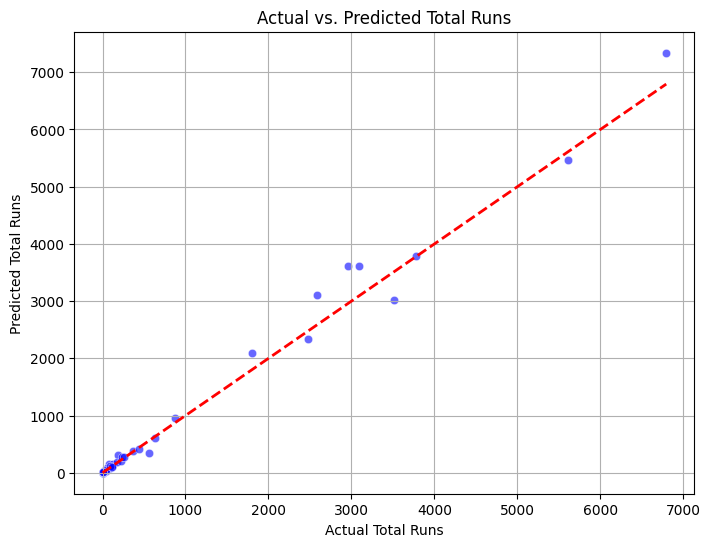

In [13]:
# Make predictions on the entire test set
y_pred = loaded_model.predict(X_test)

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)

# Add diagonal reference line (Perfect Predictions Line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

# Labels and title
plt.xlabel("Actual Total Runs")
plt.ylabel("Predicted Total Runs")
plt.title("Actual vs. Predicted Total Runs")
plt.grid(True)

# Show the plot
plt.show()